# House Pricing Regression using Dense Neural Network (DNN) 

## Import Libraries

In [53]:
# CÉLULA 1 - Execute PRIMEIRO, antes de tudo!
import tf_startup

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Upload and Explore Dataset
[The Boston house-price data](http://lib.stat.cmu.edu/datasets/boston) 
* This is a dataset taken from the StatLib library which is maintained at Carnegie Mellon University.
* There are 506 samples, each one with 13 attributes (Features `Xi` from 0 to 12) of houses at different locations around the Boston suburbs in the late 1970s. The attributes themselves are defined in the StatLib website (as per capta crime rate in the area, number of rooms, distance  from employemment center, etc).
Below the attributes (or features) in order:
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in \$1000's
- Target (`Y`) is the median values of the houses at a location (in USD 1,000).

**Goal**
*  Our goal is to build a regression model that takes these **13 features as input** and **output a single value prediction** of the "median value of owner-occupied homes (in USD 1000)."
* Dataset can be download direct from: [tf.keras.datasets.boston_housing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)


In [55]:
data = tf.keras.datasets.boston_housing

(x_train, y_train), (x_test, y_test) = data.load_data() # data and labels

In [56]:
print(x_train.shape) # 404 samples, 13 features
print(y_train.shape) # 404 samples, 1 label

(404, 13)
(404,)


In [57]:
print(x_test.shape) # 102 samples, 13 features
print(y_test.shape) # 102 samples, 1 label  

(102, 13)
(102,)


In [58]:
x_train[10] # row 10 of training data


array([  9.59571,   0.     ,  18.1    ,   0.     ,   0.693  ,   6.404  ,
       100.     ,   1.639  ,  24.     , 666.     ,  20.2    , 376.11   ,
        20.31   ])

In [59]:
y_train[10]

np.float64(12.1)

### Exploring Target (Y)

In [60]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [61]:
print('Min price in $K:  ',y_train.min())
print('Mean price in $K:  ',round(y_train.mean(),2))
print('Max price in $K: ',y_train.max())

Min price in $K:   5.0
Mean price in $K:   22.4
Max price in $K:  50.0


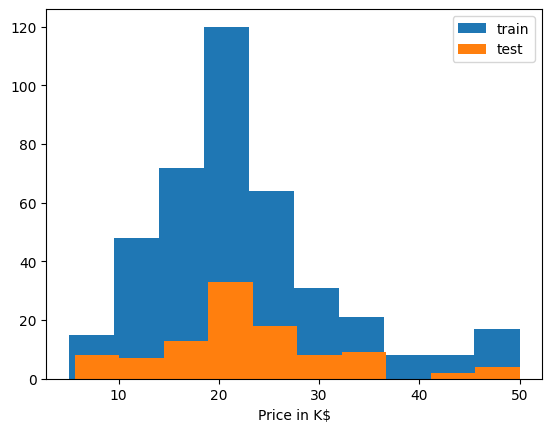

In [62]:
plt.hist(y_train, label='train')
plt.hist(y_test, label = 'test')
plt.xlabel('Price in K$')
plt.legend();

### Exploring Input Features (X)

In [63]:
len(x_train[1]) # number of features - 13 features

13

In [64]:
for i in range(len(x_train[0])):
  print("Feature {} ==> range from {} to {}".format(
      i, x_train[:,i].min(), x_train[:,i].max()
      )
  )

Feature 0 ==> range from 0.00632 to 88.9762
Feature 1 ==> range from 0.0 to 100.0
Feature 2 ==> range from 0.46 to 27.74
Feature 3 ==> range from 0.0 to 1.0
Feature 4 ==> range from 0.385 to 0.871
Feature 5 ==> range from 3.561 to 8.725
Feature 6 ==> range from 2.9 to 100.0
Feature 7 ==> range from 1.1296 to 10.7103
Feature 8 ==> range from 1.0 to 24.0
Feature 9 ==> range from 188.0 to 711.0
Feature 10 ==> range from 12.6 to 22.0
Feature 11 ==> range from 0.32 to 396.9
Feature 12 ==> range from 1.73 to 37.97


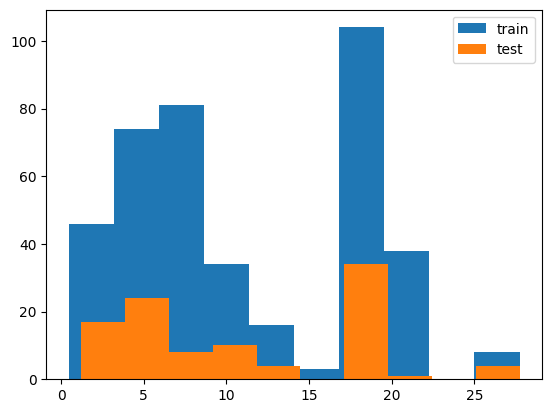

In [65]:
feature = 2
plt.hist(x_train[:,feature], label='train')
plt.hist(x_test[:,feature], label = 'test')
plt.legend();

In [66]:
print (x_train.max())
print (x_train.min())

711.0
0.0


### Preprocessing Data 

**Normalizing Data**: 
We notice that values range varies depending on the type of the feature. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1 (or at least with similar ranges), a process called 'normalizing'. In this case, all features will be `rescaled`.

The standard score of a sample `x` is calculated as:

        z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False` and `s` is the standard deviation of the training samples or one if `with_std=False`.

In [67]:
from sklearn.preprocessing import StandardScaler # import the class StandardScaler (standardization to zero mean and unit variance)
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(x_train) # compute the mean and std to be used for later scaling

# then we call the transform method to scale both the training and testing data
x_train_norm = scaler.transform(x_train) # perform standardization by centering and scaling
x_test_norm = scaler.transform(x_test) # use the same transformation on the test data as well

Another way do normalize data directly with numpy is:
- Get per-feature statistics (mean, standard deviation) from the training set to normalize by:
  - x_train_mean = np.mean(x_train, axis=0)
  - x_train_std = np.std(x_train, axis=0)
  - x_train_norm = (x_train - x_train_mean) / x_train_std

  - x_test_norm = (x_test - x_train_mean) / x_train_std

**Note** that the quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

In [68]:
print (x_train_norm.max())
print (x_train_norm.min())

9.234847178400438
-3.8172503201932715


A sample output

In [69]:
print(x_train_norm[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


## Define Model

In [70]:
x_train.shape # 404 samples, 13 features

(404, 13)

In [71]:
x_train.shape[1] # number of features - 13 features

13

In [72]:
input_shape = x_train.shape[1]
input_shape

13

The model should be created, for example with those layers:
- [input] ==> [hidden] ==> [output]:
  - 13 ==> [20] ==>  1

The **Input Layer** should be 13 (number of features) and the **Output Layer** shoub be 1 to match the target (y). The number of neurons at **Hidden layers** are arbitrary.

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((input_shape,)),
    tf.keras.layers.Dense(20, activation='relu'), # hidden layer with 20 neurons and ReLU activation
    tf.keras.layers.Dense(1)
    ])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

Input layer has 13 conections, one for each feature [X]. Each feature goes to each one of the neurons of 1st Dense Layer, that has 20 Neurons. So, total parameters 1st Dense Layer will be ***ws=(13 x 20) + bs=20 ==> 280***. The output layer will be only one Neuron that has one input from the output of previous layer ***(20 ) + 1 b ==> 21***.

For simplicity, the input layer can be "merge with 1st layer"

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, 
                          activation='relu', 
                          input_shape = [13]),
    tf.keras.layers.Dense(1)
    ])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

##Compile Model

### Type of errors
In statistics, `Mean Absolute Error (MAE)` is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:


$$MAE=\frac{1}{n}\sum_{i=1}^{n}(\left|y_{i}-\hat{y}_{i}\right|)$$


Another alternative to evaluate regression is the `Root Mean Square Error (RMSE)`.
This is the root of the  mean of the squared errors. It is a most popular measure of regression model's performance because also keep the same unit as y and larger errors are noted more than with MAE.

$$RSME=\sqrt{\frac{1}{n}\sum_{i=1}^{n}{(y_{i}-\hat{y}_{i})}^2}$$

You can use MSE to calculate loss, but also tracking the MAE or RSME, once those values will have the "same order" of the Target (in the case, multiples of USD1,000).

The optimizer used is [ADAM](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam), a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. The hyperparameter "Learning-Rate" used is the default ==> 0.001

In [75]:
model.compile(
    optimizer='adam', # Adam optimization algorithm.
    loss='mse', # mean squared error (MSE) loss function — suitable for regression tasks.
    metrics=['mae'] # mean absolute error (MAE) metric — used to monitor the training and testing steps.
    )

## Train the model

In [76]:
history = model.fit(
    x_train_norm, 
    y_train,
    epochs=1000, 
    verbose=0
    )

Inspecting the model

In [77]:
train_eval = model.evaluate(x_train_norm, y_train)
print ("Training data MAE: {:.2}".format(train_eval[1]))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.3666 - mae: 1.6762  
Training data MAE: 1.7


In [78]:
history.history.keys()

dict_keys(['loss', 'mae'])

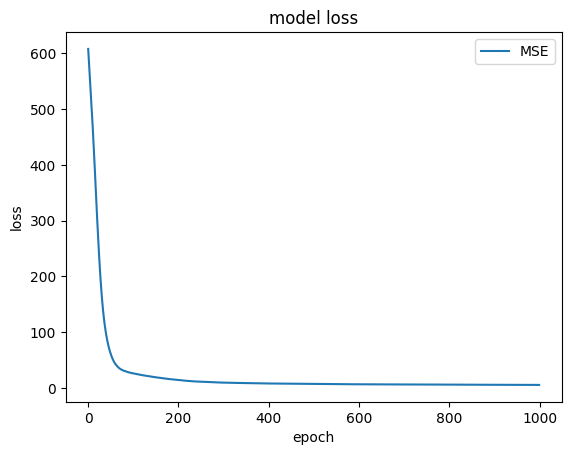

In [79]:
plt.plot(history.history['loss'], label='MSE')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

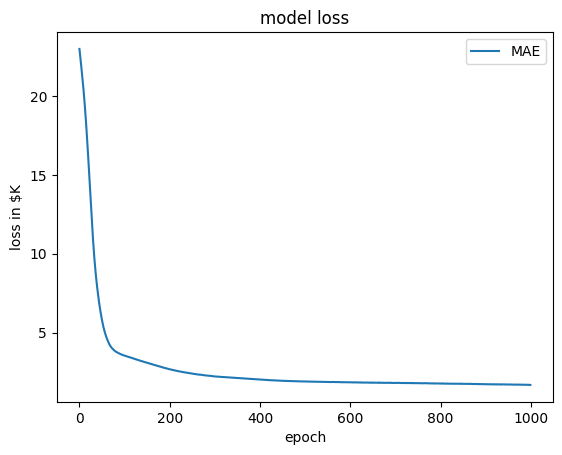

In [80]:
plt.plot(history.history['mae'], label='MAE')
plt.title('model loss')
plt.ylabel('loss in $K')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

## Testing the trained model



In [81]:
test_eval = model.evaluate(x_test_norm, y_test)
print ("Test data MAE: {:.2}".format(test_eval[1]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15.8934 - mae: 2.5762
Test data MAE: 2.6


In [82]:
rsme = round(np.sqrt(test_eval[0]), 3)
rsme

np.float64(3.987)

The model has an RSME error of around USD4,000 and an MAE of around USD 2,600, what is very good for house's price estimation.  

Note: With features **not normalized**, we got loss (MSE): 22.0815; RSME: USD4,700 and  MAE: USD3,500

In [83]:
y_hat = model.predict(x_test_norm)
print(y_hat[:5]) # get the output predict values for the 5 first samples

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[ 9.08]
 [17.84]
 [22.56]
 [36.75]
 [24.6 ]]


In [84]:
y_test[:5] # get the output real known values for the 5 first samples

array([ 7.2, 18.8, 19. , 27. , 22.2])

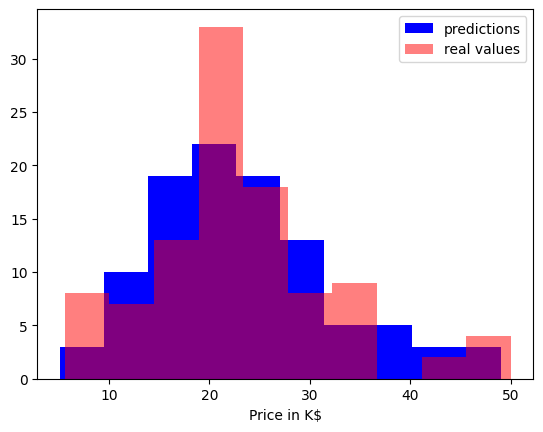

In [85]:
plt.hist(y_hat, label='predictions', color = 'b')
plt.hist(y_test, label = 'real values', color = 'r', alpha=0.5)
plt.xlabel('Price in K$')
plt.legend();

## Doing Inference

In [86]:
xt = np.array([1.1, 0., 9., 0., 0.6, 7., 92., 3.8 , 4., 300., 21., 200, 19.5])
xt.shape

(13,)

In [87]:
x_train.shape

(404, 13)

In [88]:
xt = np.reshape(xt, (1, 13))
xt.shape

(1, 13)

In [89]:
xt

array([[  1.1,   0. ,   9. ,   0. ,   0.6,   7. ,  92. ,   3.8,   4. ,
        300. ,  21. , 200. ,  19.5]])

In [90]:
xt_norm = scaler.transform(xt)
xt_norm

array([[-0.28659955, -0.48361547, -0.30934443, -0.25683275,  0.36401915,
         1.03386853,  0.82381223,  0.02945662, -0.62624905, -0.63729594,
         1.14850044, -1.64672402,  0.93287232]])

In [91]:
yt = model.predict(xt_norm)
yt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[15.266]], dtype=float16)

In [92]:
xt = np.array([1.1, 0., 9., 0., 0.6, 7., 92., 3.8 , 4., 300., 21., 200, 19.5])
xt = np.reshape(xt, (1, 13))
xt_norm = scaler.transform(xt)
yt = model.predict(xt_norm)
print("The predict value for this house is US${:.2f} thousand".format(yt[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


The predict value for this house is US$15.27 thousand


# Extra 
## Finding the correct Hyperparameters
- [KerasTuner](https://keras.io/keras_tuner/)

KerasTuner is an easy-to-use, scalable hyperparameter optimization framework that solves the pain points of hyperparameter search.


In [93]:
!pip install keras-tuner --upgrade

In [94]:
import tensorflow as tf
import keras_tuner as kt

In [95]:
data = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = data.load_data()

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(x_train)

# then we call the transform method to scale both the training and testing data
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

Write a function that creates and returns a Keras model. Use the `hp` argument to define the hyperparameters during model creation.

In [97]:
def build_model(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(
      hp.Choice('units', [10, 20, 30]),
      activation='relu'))
  
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

Initialize a tuner (here, RandomSearch). We use objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.

In [98]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


Start the search and get the best model:

In [99]:
tuner.search(
    x_train_norm, y_train, 
    epochs=500, 
    validation_data=(x_test_norm, y_test))

best_model = tuner.get_best_models()[0]

In [100]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Choice)
{'default': 10, 'conditions': [], 'values': [10, 20, 30], 'ordered': True}


In [101]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 1 summary
Hyperparameters:
units: 10
Score: 16.520479202270508

Trial 0 summary
Hyperparameters:
units: 30
Score: 17.134763717651367

Trial 2 summary
Hyperparameters:
units: 20
Score: 18.379539489746094
